# Scan analysis - shap

Calculates shap values.

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [15]:
import pandas as pd

import itertools

from tqdm import tqdm

import seaborn as sns

from math import floor

import pickle

import numpy as np
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import shap
from xgboost import XGBRegressor

from plots2.fns import (
    get_corner_annotations,
    get_dose_colors
)


from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE,
)

from poly2.utils import (
    get_dispersal_kernel,
    trait_vec,
    beta_dist,
    gamma_dist,
    get_dist_var,
    get_dist_mean,
    edge_values,
    object_load, 
    object_dump,
    get_best_dose_for_cb,
    load_train_test_data,
    get_best_model,
)
from poly2.shap import get_shap_values
from poly2.config import Config
from poly2.simulator import SimulatorOneTrait
from poly2.consts import FUNG_DECAY_RATE, MUTATION_PROP, MUTATION_SCALE

from poly2.run import get_data_from_pars

In [3]:
df = pd.read_csv('../outputs/combined/processed_scan_all.csv')

In [4]:
X_train, y_train, X_test, y_test = load_train_test_data('all')

In [5]:
X_train = X_train.drop('ME_mean', axis=1)

In [6]:
X_test = X_test.drop('ME_mean', axis=1)

In [7]:
model = get_best_model('all')

{'max_depth': 10, 'n_estimators': 1740, 'learning_rate': 0.0199085136730978, 'subsample': 0.5468065466488763, 'colsample_bytree': 0.8879850476692774, 'tree_method': 'hist'}


In [8]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8879850476692774,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0199085136730978,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1740, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5468065466488763,
             tree_method='hist', validate_parameters=1, verbosity=None)

In [9]:
yp = model.predict(X_test)

In [10]:
rmse = mean_squared_error(y_test, yp, squared=False)

In [11]:
rmse

0.10849480590454

In [12]:
explainer = shap.TreeExplainer(model)

In [13]:
%%time
shap_vals = explainer(X_train.head(10000))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Wall time: 11min 2s


In [14]:
shap_vals

.values =
array([[ 0.3263691 , -0.0335752 ,  0.00103901, ...,  0.01045278,
         0.000408  , -0.07356111],
       [ 0.3260973 , -0.03357979,  0.00119738, ...,  0.01049981,
         0.00038799, -0.07355764],
       [ 0.32453138, -0.03362142,  0.00264786, ...,  0.01076253,
         0.00045485, -0.07356088],
       ...,
       [-0.05598227, -0.03633141,  0.00634619, ...,  0.12950213,
         0.02389472, -0.1113785 ],
       [-0.06373165, -0.03757818,  0.00631687, ...,  0.13354346,
         0.02605141, -0.1122385 ],
       [-0.07062688, -0.03897346,  0.00609088, ...,  0.13748969,
         0.02793536, -0.11334542]], dtype=float32)

.base_values =
array([0.81195354, 0.81195354, 0.81195354, ..., 0.81195354, 0.81195354,
       0.81195354], dtype=float32)

.data =
array([[ 1.        , 17.87973416,  2.74406752, ...,  1.78635515,
         0.7035737 ,  1.95788972],
       [ 2.        , 17.87973416,  2.74406752, ...,  1.78635515,
         0.7035737 ,  1.95788972],
       [ 3.        , 17.879734

In [17]:
alpha = 0.8
size = 0.4


clrmap = plt.cm.cool  # define the colormap
cmaplist = [clrmap(i) for i in range(clrmap.N)]
cm3 = LinearSegmentedColormap.from_list("", cmaplist, clrmap.N)

bounds = np.linspace(1, 35, 35)
norm = BoundaryNorm(bounds, clrmap.N)
cmap3 = ScalarMappable(cmap=cm3, norm=norm)
colors3 = cmap3.to_rgba(shap_vals[:, 'year'].data)

In [18]:
shap_values = shap_vals

(-0.5, 0.5)

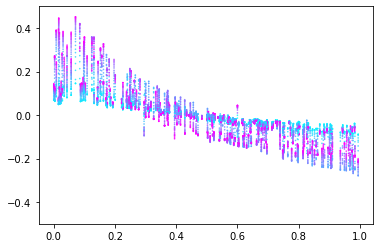

In [28]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "asymp"].data,
    shap_values[:, "asymp"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

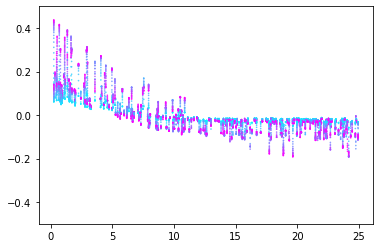

In [29]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "mu"].data,
    shap_values[:, "mu"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

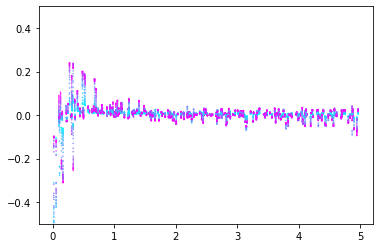

In [30]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "b"].data,
    shap_values[:, "b"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

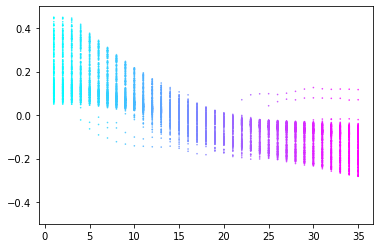

In [31]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "year"].data,
    shap_values[:, "year"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

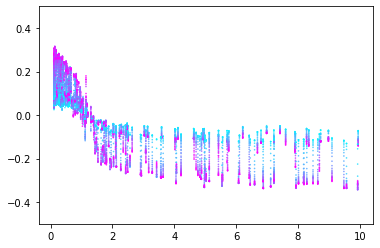

In [32]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "m_scale"].data,
    shap_values[:, "m_scale"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

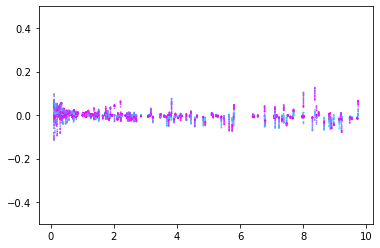

In [33]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "m_prop"].data,
    shap_values[:, "m_prop"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

(-0.5, 0.5)

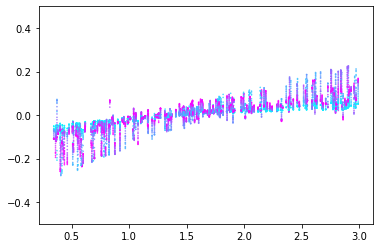

In [34]:
f, ax = plt.subplots()

ax.scatter(
    shap_values[:, "dec_rate"].data,
    shap_values[:, "dec_rate"].values,
    alpha=alpha, 
    color=colors3,
    s=size,
)

ax.set_ylim([-0.5, 0.5])

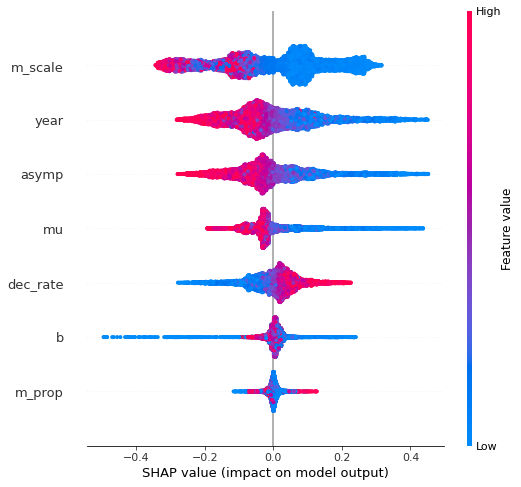

In [35]:
plt.close('all')

shap.plots.beeswarm(shap_values, plot_size=(8, 8), show=False)